In [88]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr

# Font settings
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # Prevent minus sign issues


orgDf = pd.read_csv('../../datasets/data.csv')
orgDf.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [89]:
editedDf = orgDf.drop(['City_Tier', 'Occupation'], axis=1)
editedDf

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,1945.982149,1210.454952,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21,1,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,3770.919375,2356.408295,...,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567373,30,1,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,896.290751,1571.911103,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817240,27,2,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,2545.419412,4721.792454,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212


### High Corr Expenditure / Occupation(Employees Vs. Unemployees)

In [90]:
orgDf['Occupation'].unique()
onlyHired = orgDf[orgDf['Occupation'].isin(['Self_Employed', 'Professional'])]
onlyHired

columns_needed = [
    'Income', 'Groceries', 'Transport', 'Healthcare',
    'Disposable_Income', 'Desired_Savings',
    'Education', 'Potential_Savings_Education',
    'Dependents', 'Miscellaneous'
]

onlyHired = onlyHired[columns_needed]
corrOnlyHired = onlyHired.corr()
corrOnlyHired

,Income,Groceries,Transport,Healthcare,Disposable_Income,Desired_Savings,Education,Potential_Savings_Education,Dependents,Miscellaneous
Income,1.000000,0.985726,0.982221,0.978350,0.886986,0.949945,0.818557,0.683119,0.017133,0.923732
Groceries,0.985726,1.000000,0.967465,0.966182,0.864089,0.931580,0.803221,0.660476,0.016819,0.910246
Transport,0.982221,0.967465,1.000000,0.958890,0.868372,0.934787,0.801161,0.674761,0.016993,0.904536
Healthcare,0.978350,0.966182,0.958890,1.000000,0.864501,0.927186,0.790893,0.651868,0.011285,0.909787
Disposable_Income,0.886986,0.864089,0.868372,0.864501,1.000000,0.909683,0.644596,0.560216,-0.051013,0.798810
Desired_Savings,0.949945,0.931580,0.934787,0.927186,0.909683,1.000000,0.766011,0.656528,0.012433,0.868366
Education,0.818557,0.803221,0.801161,0.790893,0.644596,0.766011,1.000000,0.818560,0.284511,0.758392
Potential_Savings_Education,0.683119,0.660476,0.674761,0.651868,0.560216,0.656528,0.818560,1.000000,0.222282,0.638764
Dependents,0.017133,0.016819,0.016993,0.011285,-0.051013,0.012433,0.284511,0.222282,1.000000,0.018284
Miscellaneous,0.923732,0.910246,0.904536,0.909787,0.798810,0.868366,0.758392,0.638764,0.018284,1.000000


In [91]:
orgDf['Occupation'].unique()
onlyNonHired = orgDf[orgDf['Occupation'].isin(['Retired', 'Student'])]
onlyNonHired

columns_needed = [
    'Income', 'Groceries', 'Transport', 'Healthcare',
    'Disposable_Income', 'Desired_Savings',
    'Education', 'Potential_Savings_Education',
    'Dependents', 'Miscellaneous'
]

onlyNonHired = onlyNonHired[columns_needed]
corrOnlyNonHired = onlyNonHired.corr()
corrOnlyNonHired

,Income,Groceries,Transport,Healthcare,Disposable_Income,Desired_Savings,Education,Potential_Savings_Education,Dependents,Miscellaneous
Income,1.000000,0.985745,0.981671,0.979432,0.875385,0.938164,0.766076,0.601780,0.016728,0.914601
Groceries,0.985745,1.000000,0.968155,0.963566,0.852387,0.919234,0.751062,0.590860,0.015921,0.899117
Transport,0.981671,0.968155,1.000000,0.961506,0.853810,0.919902,0.746742,0.587287,0.013675,0.894807
Healthcare,0.979432,0.963566,0.961506,1.000000,0.848290,0.916525,0.754006,0.591402,0.016081,0.898925
Disposable_Income,0.875385,0.852387,0.853810,0.848290,1.000000,0.901595,0.554733,0.425843,-0.068434,0.782852
Desired_Savings,0.938164,0.919234,0.919902,0.916525,0.901595,1.000000,0.698121,0.547516,0.005927,0.852724
Education,0.766076,0.751062,0.746742,0.754006,0.554733,0.698121,1.000000,0.788236,0.321011,0.720819
Potential_Savings_Education,0.601780,0.590860,0.587287,0.591402,0.425843,0.547516,0.788236,1.000000,0.255772,0.569827
Dependents,0.016728,0.015921,0.013675,0.016081,-0.068434,0.005927,0.321011,0.255772,1.000000,0.030514
Miscellaneous,0.914601,0.899117,0.894807,0.898925,0.782852,0.852724,0.720819,0.569827,0.030514,1.000000


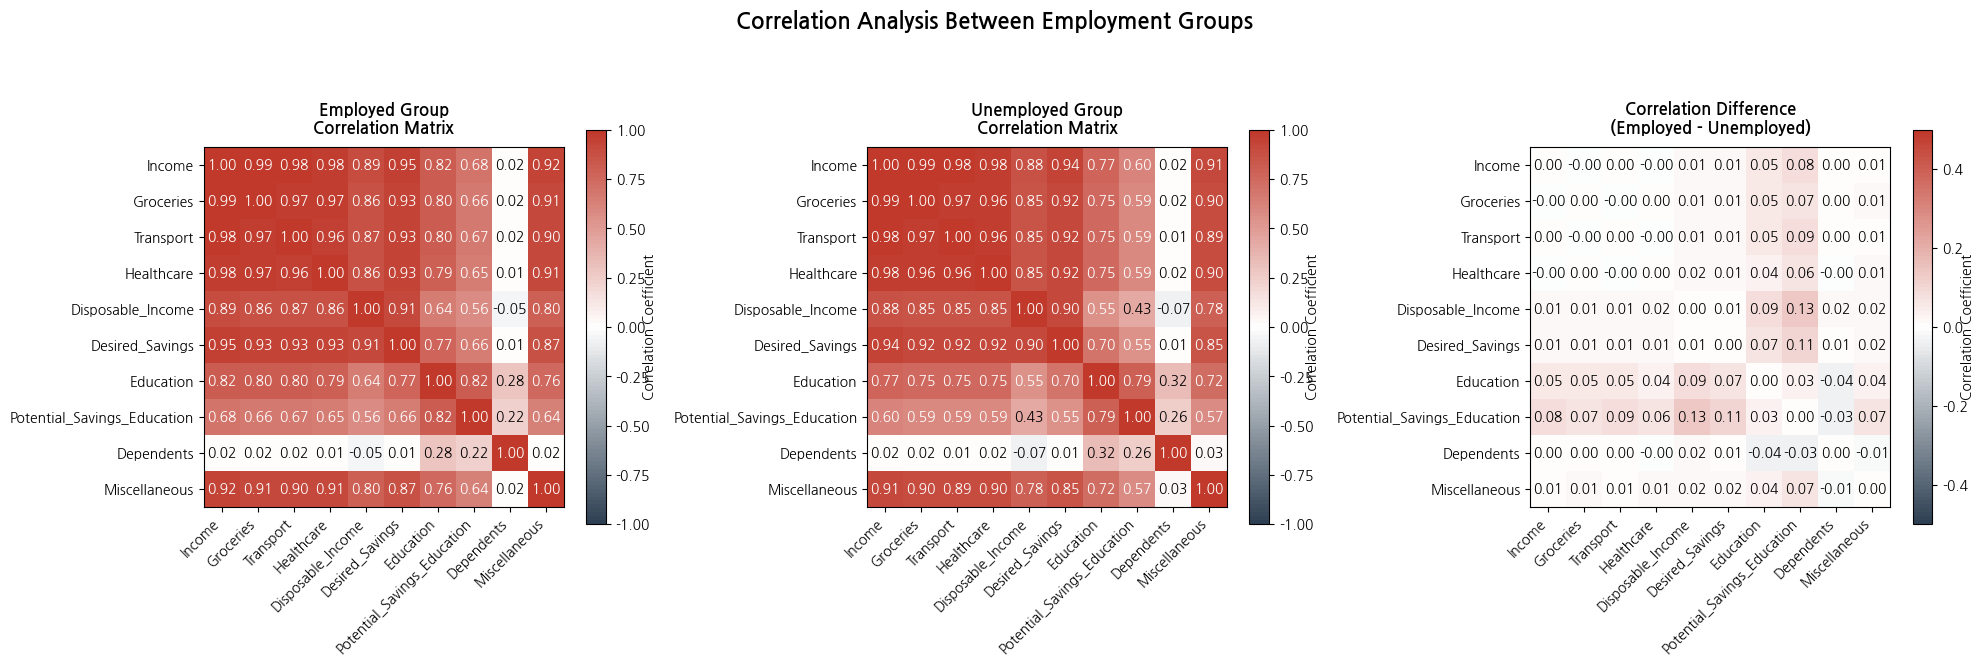

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Calculate correlation difference
correlation_diff = corrOnlyHired - corrOnlyNonHired

# Custom colormap creation
colors = ['#2E4053', '#FFFFFF', '#C0392B']  # dark blue to white to red
n_bins = 100  # smooth color transition
custom_cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Create figure
fig = plt.figure(figsize=(20, 6))
fig.suptitle('Correlation Analysis Between Employment Groups', 
             fontsize=16, 
             fontweight='bold',
             y=1.05)

# Helper function for heatmap
def create_heatmap(data, ax, title, vmin=-1, vmax=1, center=None):
    im = ax.imshow(data, cmap=custom_cmap, vmin=vmin, vmax=vmax)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Correlation Coefficient', rotation=90, va="bottom")
    
    # Add numbers
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            color = 'white' if abs(data.iloc[i, j]) > 0.5 else 'black'
            text = ax.text(j, i, f'{data.iloc[i, j]:.2f}',
                         ha="center", va="center", color=color)
    
    # Set title and labels
    ax.set_title(title, pad=10, fontsize=12, fontweight='bold')
    
    # Set ticks
    ax.set_xticks(np.arange(len(data.columns)))
    ax.set_yticks(np.arange(len(data.index)))
    
    # Set tick labels
    ax.set_xticklabels(data.columns, rotation=45, ha='right')
    ax.set_yticklabels(data.index)
    
    return im

# First subplot: Employed group
ax1 = plt.subplot(131)
im1 = create_heatmap(corrOnlyHired, ax1, 'Employed Group\nCorrelation Matrix')

# Second subplot: Unemployed group
ax2 = plt.subplot(132)
im2 = create_heatmap(corrOnlyNonHired, ax2, 'Unemployed Group\nCorrelation Matrix')

# Third subplot: Difference
ax3 = plt.subplot(133)
im3 = create_heatmap(correlation_diff, ax3, 'Correlation Difference\n(Employed - Unemployed)', 
                     vmin=-0.5, vmax=0.5, center=0)

# Adjust layout
plt.tight_layout()

# Add overall title
plt.subplots_adjust(top=0.85)

plt.show()


/tmp/ipykernel_500/643255018.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, hired_means[i],
/tmp/ipykernel_500/643255018.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{hired_means[i]:,.1f}',  # 천 단위 구분자 추가
/tmp/ipykernel_500/643255018.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i + bar_width, nonhired_means[i],
/tmp/ipykernel_500/643255018.py:44: FutureWarning: Series.__getitem__ treating

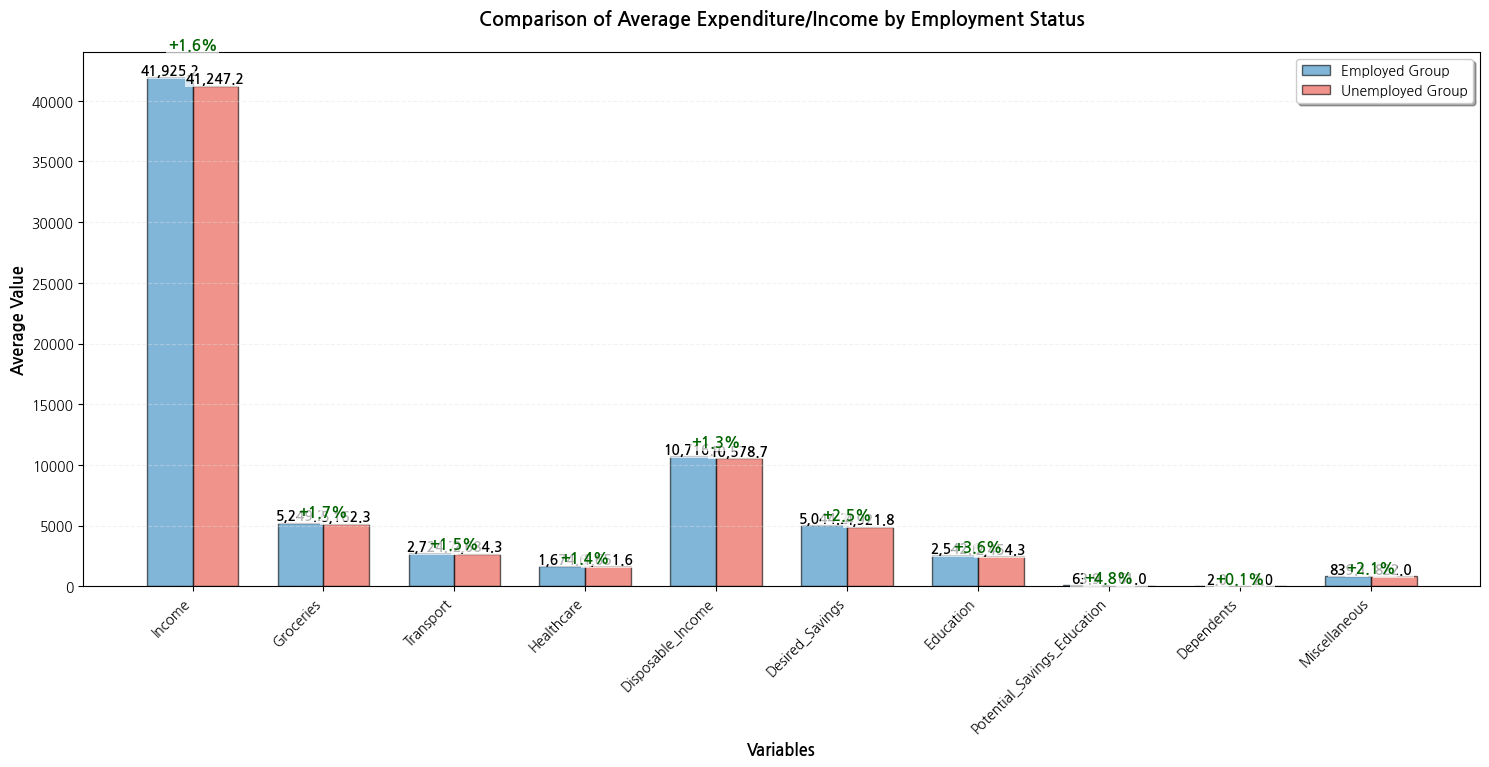


Percentage Difference Analysis (Employed vs Unemployed):
--------------------------------------------------
Income: 1.6% higher in Employed group
Groceries: 1.7% higher in Employed group
Transport: 1.5% higher in Employed group
Healthcare: 1.4% higher in Employed group
Disposable_Income: 1.3% higher in Employed group
Desired_Savings: 2.5% higher in Employed group
Education: 3.6% higher in Employed group
Potential_Savings_Education: 4.8% higher in Employed group
Dependents: 0.1% higher in Employed group
Miscellaneous: 2.1% higher in Employed group


In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate means for each group
hired_means = onlyHired.mean()
nonhired_means = onlyNonHired.mean()

# Create figure with larger size
plt.figure(figsize=(15, 8))

# Bar chart parameters
bar_width = 0.35
index = np.arange(len(columns_needed))

# Create bars with custom colors and reduced alpha for better text visibility
plt.bar(index, hired_means, bar_width, 
        label='Employed Group', 
        color='#2E86C1',
        alpha=0.6,  # 투명도 낮춤
        edgecolor='black',
        linewidth=1)
plt.bar(index + bar_width, nonhired_means, bar_width, 
        label='Unemployed Group', 
        color='#E74C3C',
        alpha=0.6,  # 투명도 낮춤
        edgecolor='black',
        linewidth=1)

# Calculate percentage differences for annotations
diff_percent = (hired_means - nonhired_means) / nonhired_means * 100

# Add value labels on top of bars with improved visibility
for i in index:
    # Employed group values
    plt.text(i, hired_means[i], 
             f'{hired_means[i]:,.1f}',  # 천 단위 구분자 추가
             ha='center', va='bottom',
             fontsize=10,  # 폰트 크기 증가
             fontweight='bold',  # 굵게
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))  # 배경 추가
    
    # Unemployed group values
    plt.text(i + bar_width, nonhired_means[i],
             f'{nonhired_means[i]:,.1f}',  # 천 단위 구분자 추가
             ha='center', va='bottom',
             fontsize=10,  # 폰트 크기 증가
             fontweight='bold',  # 굵게
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))  # 배경 추가
    
    # Add percentage difference with improved visibility
    y_pos = max(hired_means[i], nonhired_means[i]) + (max(hired_means[i], nonhired_means[i]) * 0.05)  # 위치 조정
    plt.text(i + bar_width/2, y_pos,
             f'{diff_percent[i]:+.1f}%',
             ha='center', va='bottom',
             fontsize=11,  # 폰트 크기 증가
             fontweight='bold',
             color='darkgreen',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))  # 배경 추가

# Customize the plot
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Average Value', fontsize=12, fontweight='bold')
plt.title('Comparison of Average Expenditure/Income by Employment Status',
          fontsize=14, fontweight='bold', pad=20)

# Customize x-axis with improved readability
plt.xticks(index + bar_width/2, columns_needed, rotation=45, ha='right', fontsize=10)

# Add legend with custom style
plt.legend(loc='upper right', 
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.4)  # 그리드 투명도 조정

# Adjust layout and add more space at the top
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # 상단 여백 추가

# Show plot
plt.show()

# Print detailed analysis
print("\nPercentage Difference Analysis (Employed vs Unemployed):")
print("-" * 50)
for col in columns_needed:
    diff = diff_percent[col]
    status = "higher" if diff > 0 else "lower"
    print(f"{col}: {abs(diff):.1f}% {status} in Employed group")


### High Corr Expenditure / City(Tier 1, Tier 2, and Tier 3) 

In [94]:
orgDf['City_Tier'].unique() # ['Tier_1', 'Tier_2', 'Tier_3']
onlyCity1 = orgDf[orgDf['City_Tier'].isin(['Tier_1'])]
onlyCity2 = orgDf[orgDf['City_Tier'].isin(['Tier_2'])]
onlyCity3 = orgDf[orgDf['City_Tier'].isin(['Tier_3'])]

columns_needed = [
    'Income', 'Groceries', 'Transport', 'Healthcare',
    'Disposable_Income', 'Desired_Savings',
    'Education', 'Potential_Savings_Education',
    'Dependents', 'Miscellaneous'
]

onlyCity1 = onlyCity1[columns_needed]
corrOnlyCity1 = onlyCity1.corr()

onlyCity2 = onlyCity2[columns_needed]
corrOnlyCity2 = onlyCity2.corr()

onlyCity3 = onlyCity3[columns_needed]
corrOnlyCity3 = onlyCity3.corr()

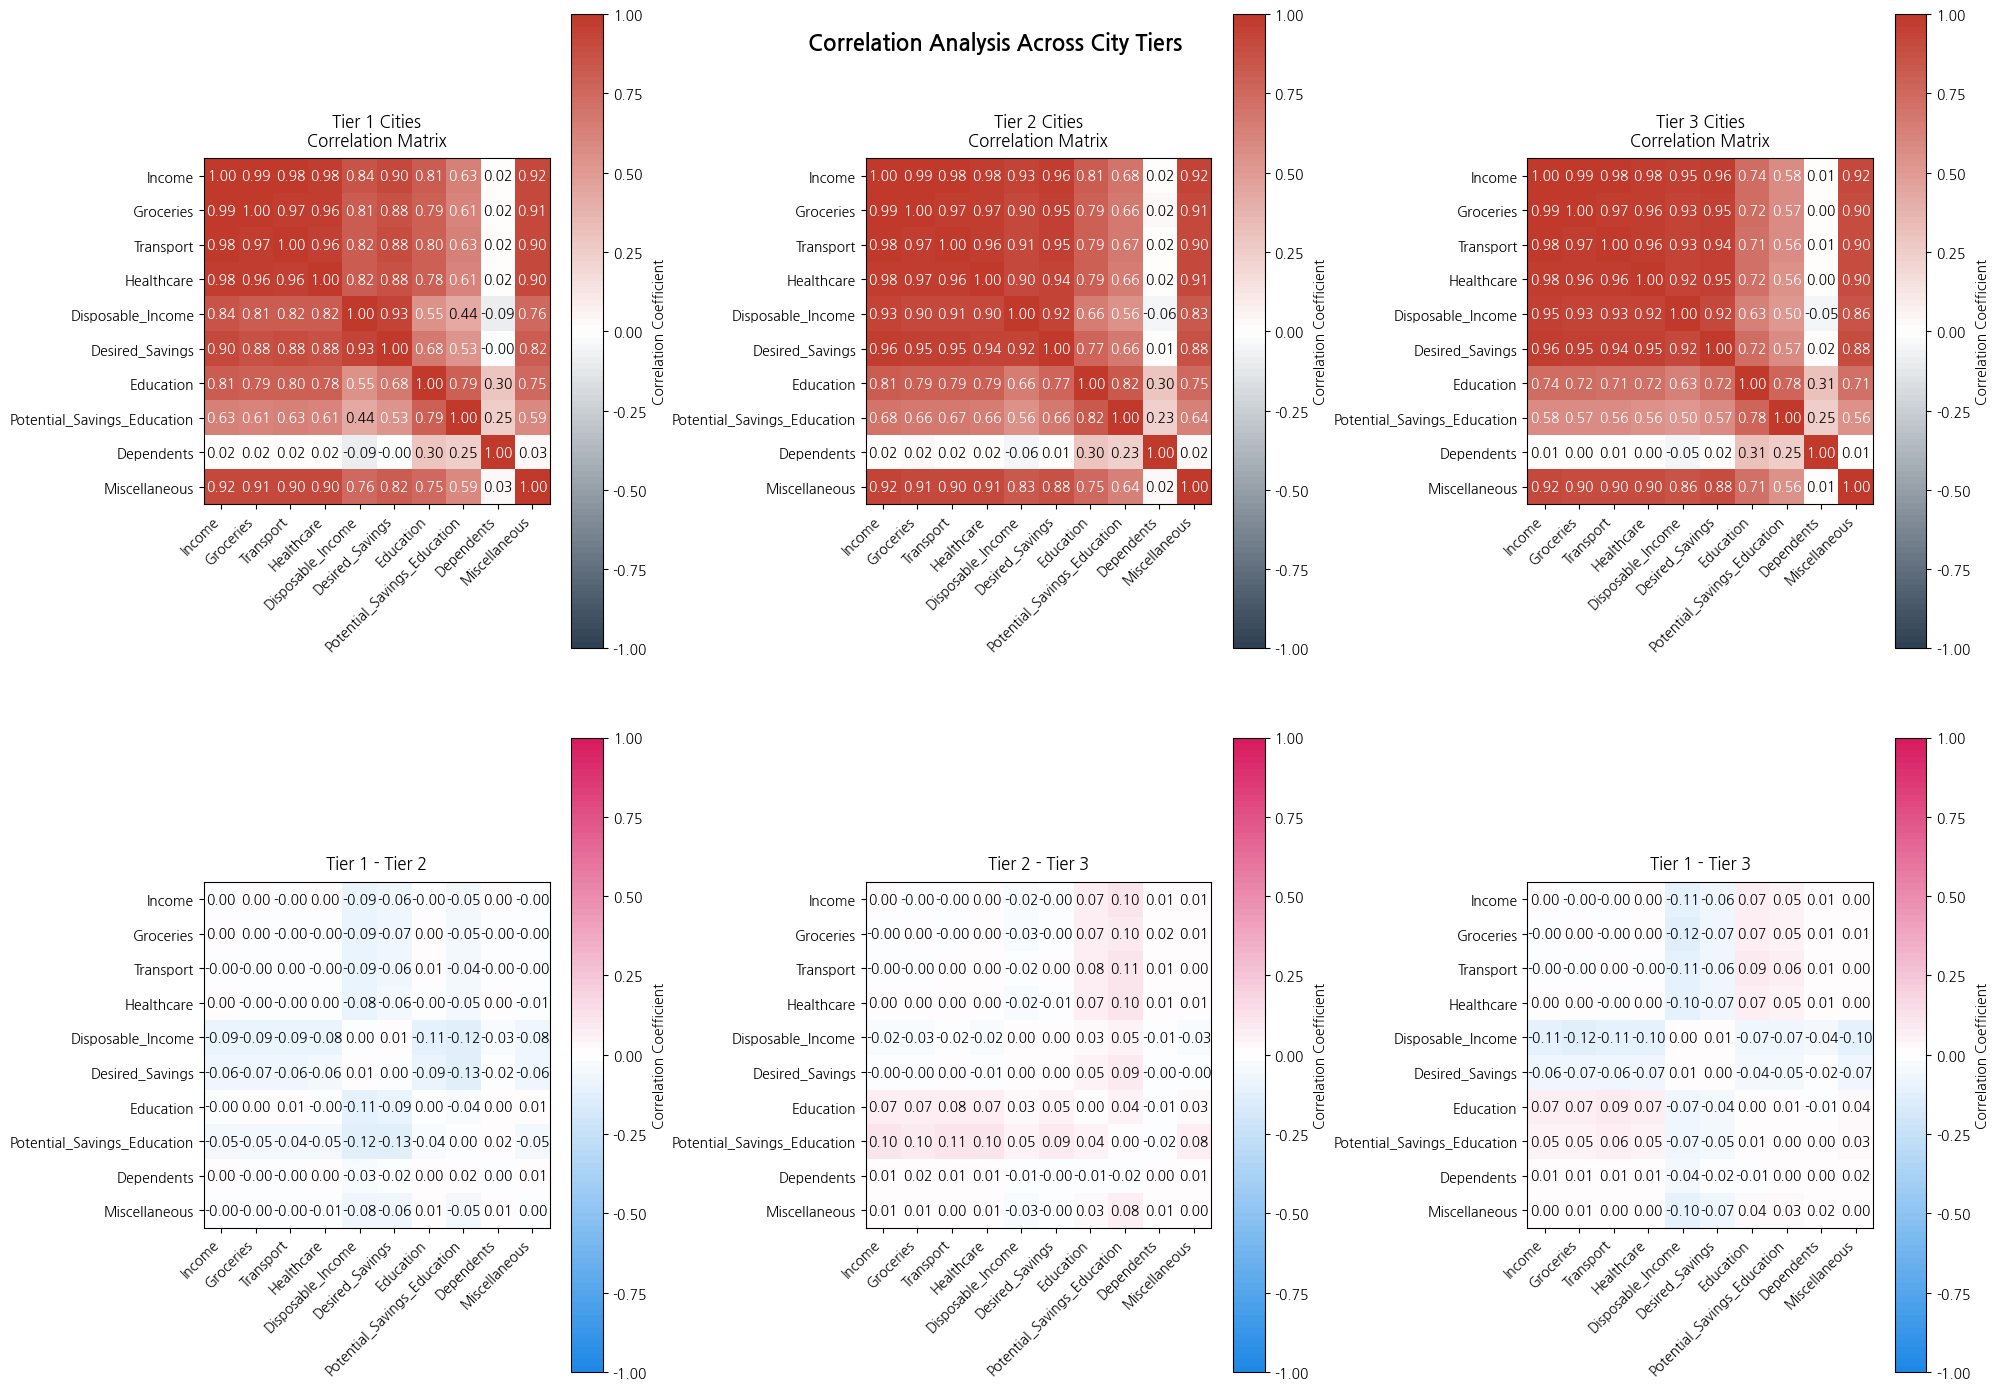


가장 큰 표준편차를 보이는 변수 쌍:

Desired_Savings - Potential_Savings_Education: 0.056
Tier 1: 0.526
Tier 2: 0.660
Tier 3: 0.573

Groceries - Disposable_Income: 0.052
Tier 1: 0.808
Tier 2: 0.903
Tier 3: 0.929

Disposable_Income - Potential_Savings_Education: 0.050
Tier 1: 0.435
Tier 2: 0.556
Tier 3: 0.504

Transport - Disposable_Income: 0.047
Tier 1: 0.817
Tier 2: 0.908
Tier 3: 0.925

Income - Disposable_Income: 0.047
Tier 1: 0.840
Tier 2: 0.926
Tier 3: 0.948


In [99]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 기본 스타일 설정
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = '#E0E0E0'

# 상관관계 히트맵 생성을 위한 함수
def create_heatmap(data, ax, title, cmap, vmin=-1, vmax=1):
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Correlation Coefficient', rotation=90)
    
    # 값 표시
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            color = 'white' if abs(data.iloc[i, j]) > 0.5 else 'black'
            text = ax.text(j, i, f'{data.iloc[i, j]:.2f}',
                         ha="center", va="center", color=color)
    
    # 축 설정
    ax.set_title(title, pad=10)
    ax.set_xticks(np.arange(len(data.columns)))
    ax.set_yticks(np.arange(len(data.index)))
    ax.set_xticklabels(data.columns, rotation=45, ha='right')
    ax.set_yticklabels(data.index)

# 메인 시각화
fig = plt.figure(figsize=(20, 15))
plt.suptitle('Correlation Analysis Across City Tiers', fontsize=16, fontweight='bold', y=0.95)

# 커스텀 컬러맵 정의
colors_main = ['#2E4053', '#FFFFFF', '#C0392B']
colors_diff = ['#1E88E5', '#FFFFFF', '#D81B60']
main_cmap = LinearSegmentedColormap.from_list("custom", colors_main, N=100)
diff_cmap = LinearSegmentedColormap.from_list("custom", colors_diff, N=100)

# 기본 상관관계 히트맵
for idx, (data, title) in enumerate([
    (corrOnlyCity1, 'Tier 1 Cities\nCorrelation Matrix'),
    (corrOnlyCity2, 'Tier 2 Cities\nCorrelation Matrix'),
    (corrOnlyCity3, 'Tier 3 Cities\nCorrelation Matrix')
]):
    ax = plt.subplot(2, 3, idx+1)
    create_heatmap(data, ax, title, main_cmap)

# 차이 분석 히트맵
corr_diffs = [
    (corrOnlyCity1 - corrOnlyCity2, 'Tier 1 - Tier 2'),
    (corrOnlyCity2 - corrOnlyCity3, 'Tier 2 - Tier 3'),
    (corrOnlyCity1 - corrOnlyCity3, 'Tier 1 - Tier 3')
]

for idx, (diff_data, title) in enumerate(corr_diffs):
    ax = plt.subplot(2, 3, idx+4)
    create_heatmap(diff_data, ax, title, diff_cmap)

plt.tight_layout()
plt.show()

# 상관관계 차이 분석 출력
print("\n가장 큰 표준편차를 보이는 변수 쌍:")
corr_stack = np.stack([corrOnlyCity1.values, corrOnlyCity2.values, corrOnlyCity3.values])
corr_std = np.std(corr_stack, axis=0)
corr_std_df = pd.DataFrame(corr_std, 
                          index=corrOnlyCity1.index,
                          columns=corrOnlyCity1.columns)

mask = np.triu(np.ones_like(corr_std_df), k=1).astype(bool)
std_pairs = [(corr_std_df.index[i], 
             corr_std_df.columns[j], 
             corr_std_df.iloc[i,j])
            for i in range(len(corr_std_df.index))
            for j in range(i+1, len(corr_std_df.columns))
            if mask[i,j]]

for var1, var2, std in sorted(std_pairs, key=lambda x: x[2], reverse=True)[:5]:
    print(f"\n{var1} - {var2}: {std:.3f}")
    print(f"Tier 1: {corrOnlyCity1.loc[var1, var2]:.3f}")
    print(f"Tier 2: {corrOnlyCity2.loc[var1, var2]:.3f}")
    print(f"Tier 3: {corrOnlyCity3.loc[var1, var2]:.3f}")


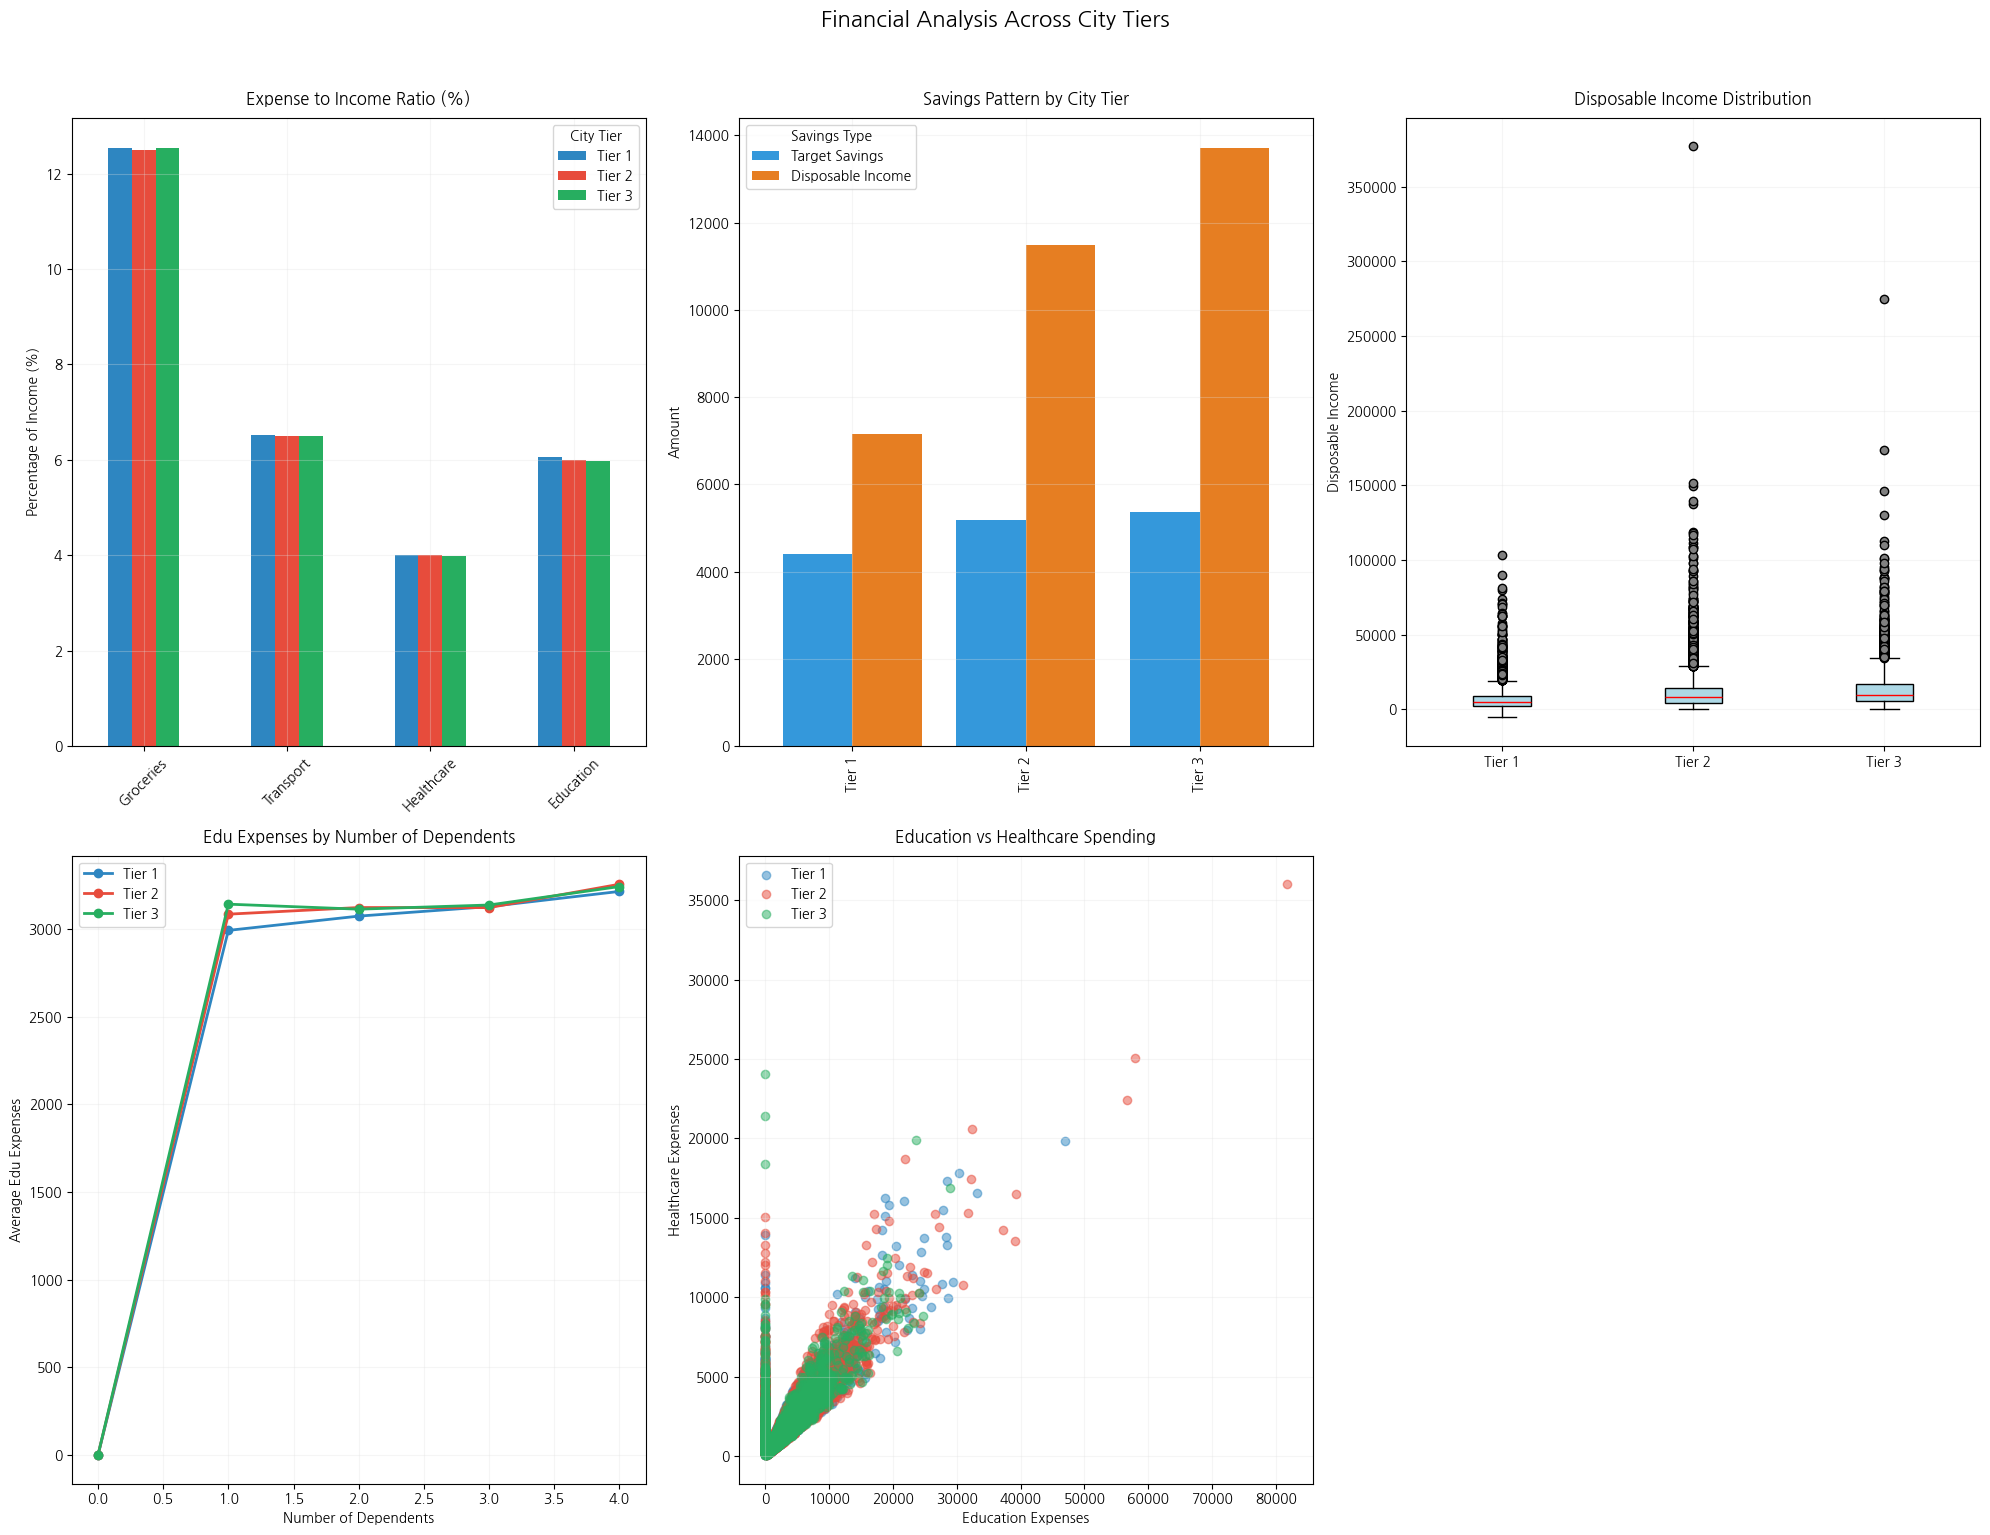


=== Key Statistics by City Tier ===

Tier 1:
Average Income: 41,068
Average Disposable Income: 7,156
Education to Income Ratio: 6.1%
Average Dependents: 2.0
Savings Achievement Rate: 1.4%

Tier 2:
Average Income: 41,713
Average Disposable Income: 11,486
Education to Income Ratio: 6.0%
Average Dependents: 2.0
Savings Achievement Rate: 1.2%

Tier 3:
Average Income: 42,031
Average Disposable Income: 13,718
Education to Income Ratio: 6.0%
Average Dependents: 2.0
Savings Achievement Rate: 1.1%


In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Set style
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = '#E0E0E0'
colors = ['#2E86C1', '#E74C3C', '#27AE60']

# Create main figure
fig = plt.figure(figsize=(20, 15))
plt.suptitle('Financial Analysis Across City Tiers', fontsize=16, y=1.02)

# 1. Expense Ratio Analysis
ax1 = plt.subplot(231)
expenses = ['Groceries', 'Transport', 'Healthcare', 'Education']
expense_ratios = pd.DataFrame({
    'Tier 1': [onlyCity1[exp].mean() / onlyCity1['Income'].mean() * 100 for exp in expenses],
    'Tier 2': [onlyCity2[exp].mean() / onlyCity2['Income'].mean() * 100 for exp in expenses],
    'Tier 3': [onlyCity3[exp].mean() / onlyCity3['Income'].mean() * 100 for exp in expenses]
}, index=expenses)

expense_ratios.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Expense to Income Ratio (%)', pad=10)
ax1.set_ylabel('Percentage of Income (%)')
ax1.set_xticklabels(expenses, rotation=45)
ax1.legend(title='City Tier')
ax1.grid(True, alpha=0.3)

# 2. Savings Analysis
ax2 = plt.subplot(232)
savings_data = pd.DataFrame({
    'Target Savings': [onlyCity1['Desired_Savings'].mean(), 
                      onlyCity2['Desired_Savings'].mean(),
                      onlyCity3['Desired_Savings'].mean()],
    'Disposable Income': [onlyCity1['Disposable_Income'].mean(),
                      onlyCity2['Disposable_Income'].mean(),
                      onlyCity3['Disposable_Income'].mean()]
}, index=['Tier 1', 'Tier 2', 'Tier 3'])

savings_data.plot(kind='bar', ax=ax2, width=0.8, color=['#3498DB', '#E67E22'])
ax2.set_title('Savings Pattern by City Tier', pad=10)
ax2.set_ylabel('Amount')
ax2.legend(title='Savings Type')
ax2.grid(True, alpha=0.3)

# 3. Income Distribution (boxplot using matplotlib)
ax3 = plt.subplot(233)
box_data = [onlyCity1['Disposable_Income'], 
            onlyCity2['Disposable_Income'],
            onlyCity3['Disposable_Income']]
ax3.boxplot(box_data, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red'),
           flierprops=dict(marker='o', markerfacecolor='gray'))
ax3.set_title('Disposable Income Distribution', pad=10)
ax3.set_xticklabels(['Tier 1', 'Tier 2', 'Tier 3'])
ax3.set_ylabel('Disposable Income')
ax3.grid(True, alpha=0.3)

# 4. Dependents vs Expenses
ax4 = plt.subplot(234)
for idx, (city_df, label) in enumerate([(onlyCity1, 'Tier 1'), 
                                      (onlyCity2, 'Tier 2'),
                                      (onlyCity3, 'Tier 3')]):
    dependents_avg = city_df.groupby('Dependents')['Education'].mean()
    ax4.plot(dependents_avg.index, dependents_avg.values, 
            marker='o', label=label, linewidth=2, color=colors[idx])

ax4.set_title('Edu Expenses by Number of Dependents', pad=10)
ax4.set_xlabel('Number of Dependents')
ax4.set_ylabel('Average Edu Expenses')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Education vs Healthcare Spending
ax5 = plt.subplot(235)
for idx, (city_df, label) in enumerate([(onlyCity1, 'Tier 1'), 
                                      (onlyCity2, 'Tier 2'),
                                      (onlyCity3, 'Tier 3')]):
    ax5.scatter(city_df['Education'], 
               city_df['Healthcare'],
               alpha=0.5,
               label=label,
               color=colors[idx])

ax5.set_title('Education vs Healthcare Spending', pad=10)
ax5.set_xlabel('Education Expenses')
ax5.set_ylabel('Healthcare Expenses')
ax5.legend()
ax5.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key statistics
print("\n=== Key Statistics by City Tier ===")
for tier, df in [('Tier 1', onlyCity1), ('Tier 2', onlyCity2), ('Tier 3', onlyCity3)]:
    print(f"\n{tier}:")
    print(f"Average Income: {df['Income'].mean():,.0f}")
    print(f"Average Disposable Income: {df['Disposable_Income'].mean():,.0f}")
    print(f"Education to Income Ratio: {(df['Education'].mean() / df['Income'].mean() * 100):.1f}%")
    print(f"Average Dependents: {df['Dependents'].mean():.1f}")
    print(f"Savings Achievement Rate: {(df['Potential_Savings_Education'].mean() / df['Desired_Savings'].mean() * 100):.1f}%")
